In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import torch
from torch import distributions, optim
from datetime import datetime
import pickle

In [16]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg = 7
# Overall Time Period
start='2020-09-15' # Mitte November/ Anfang Dezember bis Februar
end='2021-02-01'#'2021-02-01''2020-12-01'
split = '2020-12-01'

delta = datetime.strptime(split, '%Y-%m-%d') - datetime.strptime(start, '%Y-%m-%d')
split_idx = delta.days

df_observations = pd.read_csv('../data/observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])
df_observations['hospitalization'] = df_observations['hospitalization'].rolling(rolling_avg).mean()
time_period = (df_observations['Date'] >= start) & (df_observations['Date'] < end)
columns = ['Date', 'hospitalization']
df_obs_filtered = df_observations.loc[time_period][columns].reset_index(drop=True)

In [17]:
def abreviation(factor):
    if factor =="['F0_cautious_behaviour', 'F1_perception_advice', 'F2_applicability_usefullness_advice', 'F3_behaviour_others', 'F4_consequence_advice']":
        return "all_factors"
    elif factor == "['google_workplaces', 'google_residential', 'google_transit']":
        return "all_mobilitiy"
    elif factor == "None":
        return "Non Carefull %"
    else:
        return factor


77
46
Google Workplace


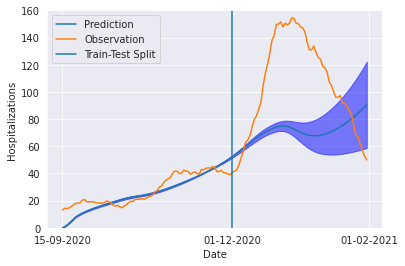

77
53
Google Residential


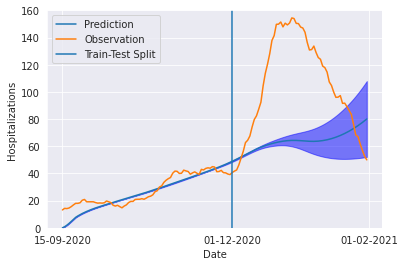

77
53
Google Transit


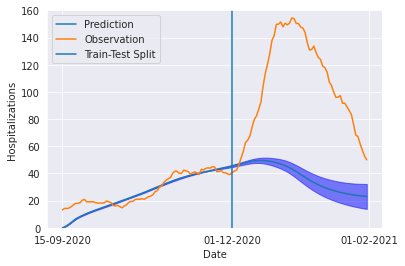

77
55
Percentage of Non careful Population Based on Behaviour


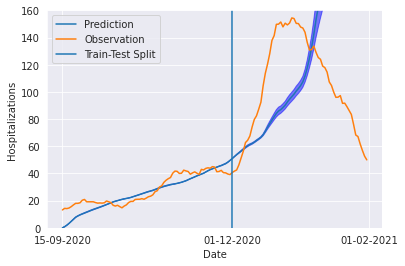

77
32
All Factors


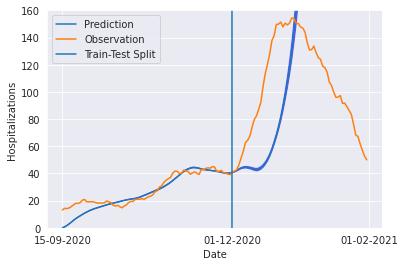

77
50
Cautious Behaviour Factor


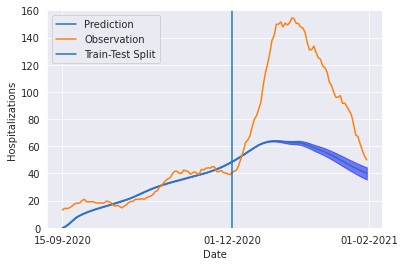

77
50
Perception Advice Factor


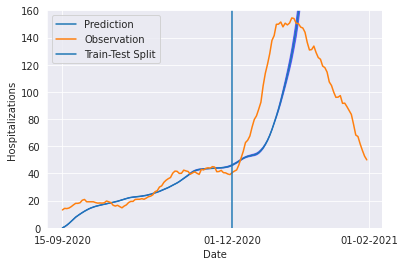

77
50
Applicability Usefulness Advice Factor


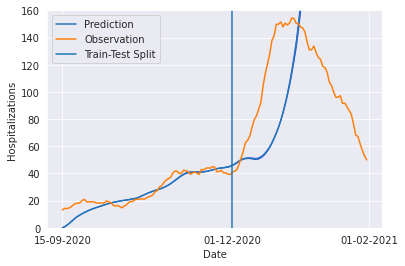

77
50
Behaviour of Others Factor


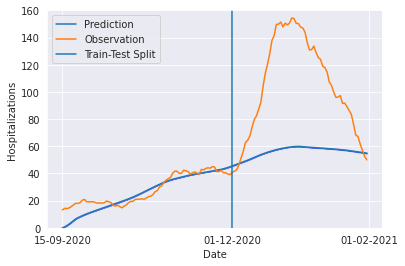

77
50
Consequence Advice Factor


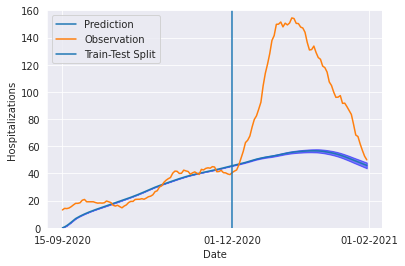

77
50
Percentage of Non Careful Population Based on Factor Analysis


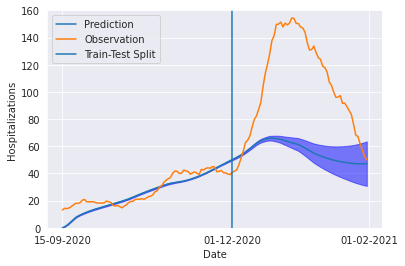

In [18]:
import os
dir_path = "../data/modeling/split_tests/split_test_50_new/"

mse_df = pd.DataFrame(columns=['input', 'mse'])

title_dict = {"['google_workplaces']": 'Google Workplace',
"['google_residential']": 'Google Residential',
"['google_transit']": 'Google Transit',
"['labels']": 'Percentage of Non careful Population Based on Behaviour',
"['F0_cautious_behaviour', 'F1_perception_advice', 'F2_applicability_usefullness_advice', 'F3_behaviour_others', 'F4_consequence_advice']": 'All Factors',
"['F0_cautious_behaviour']": 'Cautious Behaviour Factor',
"['F1_perception_advice']": 'Perception Advice Factor',
"['F2_applicability_usefullness_advice']": 'Applicability Usefulness Advice Factor',
"['F3_behaviour_others']": 'Behaviour of Others Factor',
"['F4_consequence_advice']": 'Consequence Advice Factor',
"None": 'Percentage of Non Careful Population Based on Factor Analysis'}

for filename in os.listdir(dir_path):
    with open(dir_path+filename, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        factors_info = pickle.load(f)

    for factor in factors_info.keys():
        for i in range(100):
            try:
                print(factors_info[factor]['meta_epoch_pred'][i].size)
                break
            except:
                continue
        df_test = pd.DataFrame(factors_info[factor]['meta_epoch_pred_test'])
        n = df_test.shape[1]
        length = df_test.shape[0]
        hosp = df_test.T
        mean = hosp.mean()
        ci = 1.96 * hosp.std()/np.sqrt(n)
        print(n)
        #df_test.plot.line(legend=None)
        #sns.lineplot(df_test.T)
        plt.plot(mean, label='Prediction')
        plt.fill_between(np.arange(length),(mean-ci), (mean+ci), color='b', alpha=.5)
        plt.plot(df_obs_filtered['hospitalization'], label='Observation')
        plt.ylabel('Hospitalizations')
        plt.xlabel('Date')
        plt.axvline(x=split_idx, label='Train-Test Split')
        plt.ylim((0,160))
        plt.xticks([0,split_idx,length], ['15-09-2020', '01-12-2020', '01-02-2021'])
        print(title_dict[factor])
        plt.legend()
        #plt.savefig()
        plt.show()


        _df = pd.DataFrame({'input': [filename[0]+'_'+abreviation(factor)]*len(factors_info[factor]['meta_epoch_test_mse'].keys()), 'mse':list(factors_info[factor]['meta_epoch_test_mse'].values())})
        mse_df = pd.concat([mse_df,_df], ignore_index=True)


In [19]:
title_dict = {"['google_workplaces']": 'Google Workplace',
"['google_residential']": 'Google Residential',
"['google_transit']": 'Google Transit',
"['labels']": 'Percentage of Non careful Population Based on Behaviour',
"['F0_cautious_behaviour', 'F1_perception_advice', 'F2_applicability_usefullness_advice', 'F3_behaviour_others', 'F4_consequence_advice']": 'All Factors',
"['F0_cautious_behaviour']": 'Cautious Behaviour Factor',
"['F1_perception_advice']": 'Perception Advice Factor',
"['F2_applicability_usefullness_advice']": 'Applicability Usefulness Advice Factor',
"['F3_behaviour_others']": 'Behaviour of Others Factor',
"['F4_consequence_advice']": 'Consequence Advice Factor',
"None": 'Percentage of Non Careful Population Based on Factor Analysis'}

["l_['google_workplaces']",
 "l_['google_residential']",
 "l_['google_transit']",
 "b_['labels']",
 'a_all_factors',
 "l_['F0_cautious_behaviour']",
 "l_['F1_perception_advice']",
 "l_['F2_applicability_usefullness_advice']",
 "l_['F3_behaviour_others']",
 "l_['F4_consequence_advice']",
 'l_Non Carefull %']
mse_df.replace(
    ["l_['google_workplaces']",
 "l_['google_residential']",
 "l_['google_transit']",
 "b_['labels']",
 'a_all_factors',
 "l_['F0_cautious_behaviour']",
 "l_['F1_perception_advice']",
 "l_['F2_applicability_usefullness_advice']",
 "l_['F3_behaviour_others']",
 "l_['F4_consequence_advice']",
 'l_Non Carefull %'],
    ['Google Workplace','Google Residential', 'Google Transit',
     'Percentage of Less Careful Populatioasfdn',
     'All Factors',
     'Factor 0 cautious behaviour',
     'Factor 1 perception advice',
     'Factor 2 applicability and usefulness advice',
     'Factor 3 behaviour others',
     'Factor 4 consequence advice',
     'Percentage of Less Careful Population'], inplace=True)

In [20]:
mse_df.rename(columns={"input": "Input Data", "mse": "MSE"}, inplace=True)

In [21]:
high_mse = mse_df[mse_df['Input Data'].isin(['All Factors',
     'Factor 1 perception advice',
     'Factor 2 applicability and usefulness advice'])]

low_mse = mse_df[mse_df['Input Data'].isin(    ['Google Workplace','Google Residential', 'Google Transit',
     'Factor 0 cautious behaviour',
     'Factor 3 behaviour others',
     'Factor 4 consequence advice',
     'Percentage of Less Careful Population'])]

In [23]:
low_mse

,Input Data,MSE
0,Google Workplace,1813.939999
1,Google Workplace,2259.933762
2,Google Workplace,4768.653905
3,Google Workplace,6937.152840
4,Google Workplace,12589.965357
...,...,...
534,Percentage of Less Careful Population,4883.744868
535,Percentage of Less Careful Population,4445.123629
536,Percentage of Less Careful Population,5948.581247
537,Percentage of Less Careful Population,2756.580212


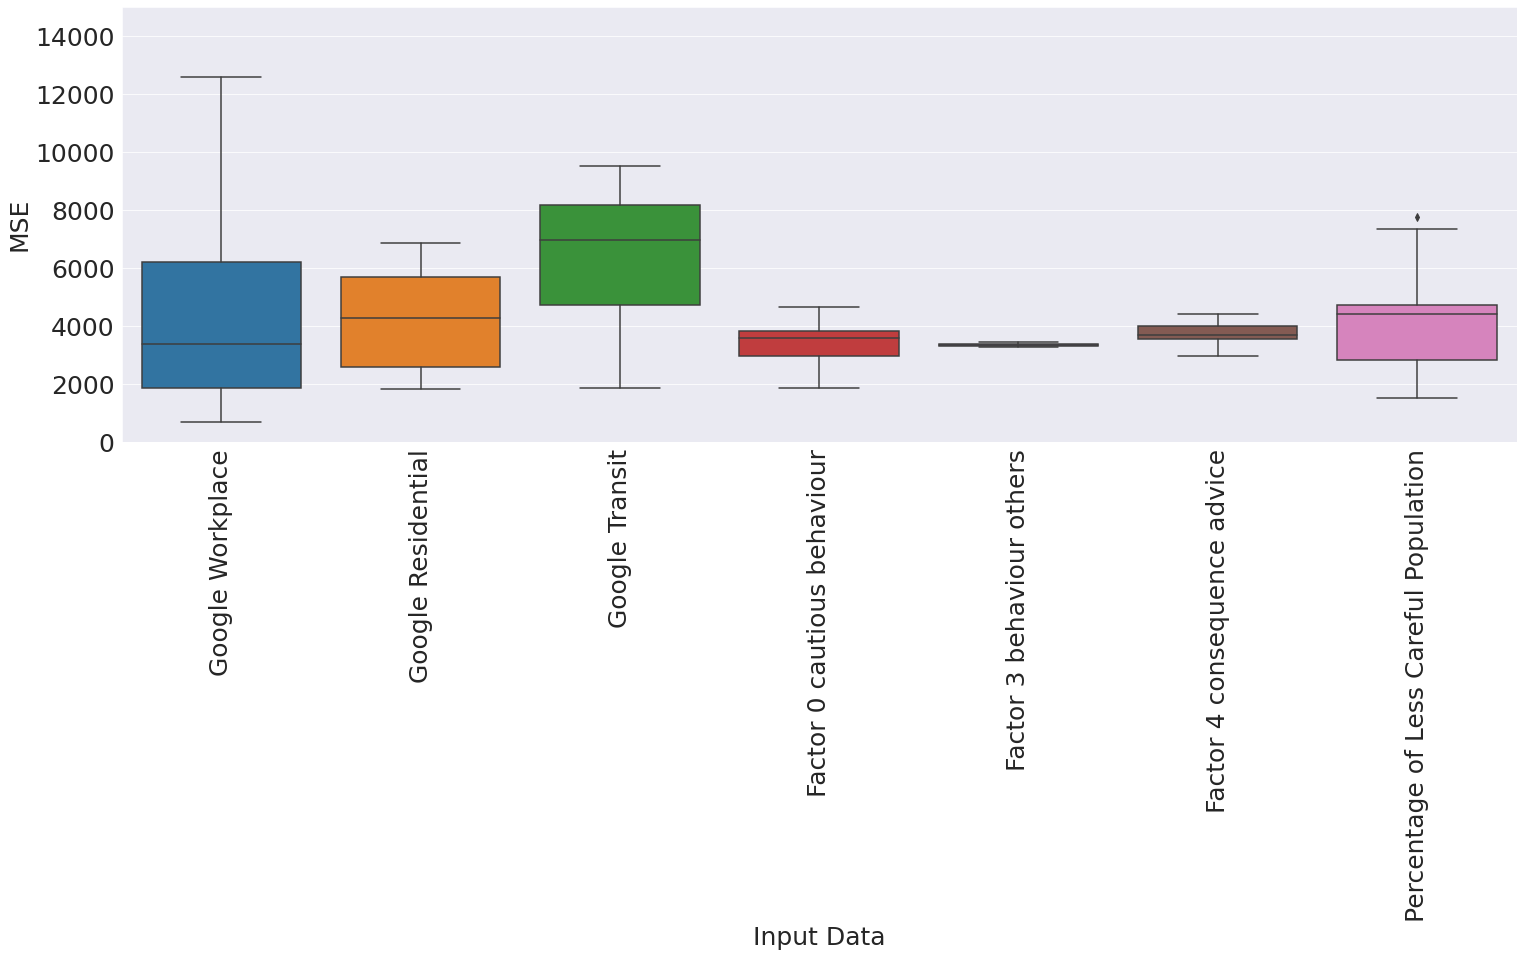

In [44]:
plt.figure(figsize=(25,8))
plt.rcParams.update({'font.size': 25})
plt.xticks(rotation=90)
sns.boxplot(data=low_mse,  x='Input Data', y='MSE')
plt.ylim((0,15000))
plt.show()

In [12]:
import plotly.express as px
fig = px.box(high_mse, x='Input Data', y='MSE')
fig.write_html("../data/modeling/split_tests/mse_50_new_high.html")

fig = px.box(low_mse, x='Input Data', y='MSE')
fig.write_html("../data/modeling/split_tests/mse_50_new_low.html")

In [83]:
high_mse.groupby('Input Data').median()

,MSE
Input Data,
All Factors,1.905770e+07
Applicability Usefulness Advice Factor,8.715873e+05
Perception Advice Factor,2.830408e+06
